In [2]:
# most of this cell's code was run in notebook 'primeTau1oct25no2'
from sage.all import sigma, nth_prime
from sage.arith.all import moebius
import pickle
import ast

def tau(n):
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2
    def step2(n, k):
        return sigma(k) * sigma(n - k)
    def step3(n):
        ans = 0
        for k in range(1, n):
            ans += step1(n, k) * step2(n, k)
        return 24*ans
    return n^4 * sigma(n) - step3(n)





tau_list =[] 
for k in range(1, 501):
    tau_list.append([k,tau(k)])
    if k%100==0:
        print(k)

with open('/Users/barrybrent/data/run18oct25no13.txt', 'wb') as wfile:
    pickle.dump(tau_list, wfile) #output snipped

with open('/Users/barrybrent/data/run18oct25no13.txt', 'rb') as rfile:
    tau_list = pickle.load(rfile)
h_list=[[0,1]]+tau_list 
j_list=[(0,0)] 
for n in [1..500]:# so j(1) = 1 = h(0) as required.
    sm=0
    for r in [1..n-1]: 
        sm=sm+j_list[r][1]*h_list[n-r][1] 
    j_n=n*h_list[n][1]-sm
    j_list.append((n,j_n))

print(h_list[:10])
print()
print(j_list[:10])
    
with open('/Users/barrybrent/data/run18oct25no14.txt', 'wb') as wfile:
    pickle.dump(j_list, wfile) # ouput snipped

100
200
300
400
500
[[0, 1], [1, 1], [2, -24], [3, 252], [4, -1472], [5, 4830], [6, -6048], [7, -16744], [8, 84480], [9, -113643]]

[(0, 0), (1, 1), (2, -49), (3, 829), (4, -8145), (5, 66011), (6, -583645), (7, 5566247), (8, -51805777), (9, 472068856)]


In [4]:
primeTau(1)

-24

In [3]:
def P_matrix(lst):
    lenlist = len(lst)
    columns = [lst]
    for k in range(1, lenlist):
        column = [0]*(k-1) + [-k] + lst
        column = column[:lenlist]
        columns.append(column)
    return matrix(columns).transpose()

# Increase PARI stack size to handle large polynomial root computations
pari.allocatemem(7*10^9)  # Allocate 7GB for PARI stack


import pickle
from sage.all import sigma, nth_prime, pari
import ast
import math
import time

from scipy.signal import find_peaks, correlate
from scipy.fft import fft, fftfreq
import numpy as np


def tau(n):
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2
    def step2(n, k):
        return sigma(k) * sigma(n - k)
    def step3(n):
        ans = 0
        for k in range(1, n):
            ans=ans+step1(n, k) * step2(n, k)
        return 24*ans
    return n^4 * sigma(n) - step3(n)





    

from sage.all import sigma, nth_prime
from sage.arith.all import moebius
import pickle
import ast






with open('/Users/barrybrent/data/run18oct25no14.txt', 'rb') as rfile:
    j_list = pickle.load(rfile)


from sage.all import *
precision_bits = 100
CF = ComplexField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable
matrix_list=[]
charpol_list=[]
roots_list=[]
aar_list=[]
centers_list=[]
max_diameter_list=[]
mins_list=[]
maxes_list=[]
log_mins_list=[]
log_maxes_list=[]
no=[]
tests=[]
for n in range(1,10):
    lst = [j[1] for j in j_list[1:n+1]] # cuts out the dummy offset
    inpt=[j for j in lst]
    pl=P_matrix(inpt)
    test=pl.det()/(tau(n)*factorial(n))
    tests.append(test)
    print((n,test))

    
print("tests:")
print(tests)

PARI stack size set to 7000000000 bytes, maximum size set to 7000002560
(1, 1)
(2, 1)
(3, 1)
(4, 1)
(5, 1)
(6, 1)
(7, 1)
(8, 1)
(9, 1)
tests:
[1, 1, 1, 1, 1, 1, 1, 1, 1]


In [4]:
import pickle
from sage.all import sigma, nth_prime
import ast

def nieburTau(n):
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2
    def step2(n, k):
        return sigma(k) * sigma(n - k)
    def step3(n):
        ans = 0
        for k in range(1, n):
            ans += step1(n, k) * step2(n, k)
        return 24*ans
    return n^4 * sigma(n) - step3(n)

def h(n):
    if n>0:
        return tau(n) # i.e., tauPrime(n)
    if n==0:
        return 1
        
with open('/Users/barrybrent/data/run18oct25no14.txt', 'rb') as rfile:
    j_list = pickle.load(rfile) #tauPrime(n) j-companion

def P_matrix(lst):
    lenlist=len(lst)
    columns=[lst]
    for k in range(1,lenlist):
        column=[0]*(k-1)
        column=column+[-k]
        column=flatten(column+[lst])
        column=column+[lst]
        column=column[:lenlist]
        columns+=[column]
    return (matrix(columns)).transpose()

from sage.all import *
precision_bits = 100
CC = ComplexField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable
matrix_list=[]
charpol_list=[]
roots_list=[]
aar_list=[]
centers_list=[]
max_diameter_list=[]
mins_list=[]
log_mins_list=[]
maxes_list=[]
log_maxes_list=[]
dets=[]
tests=[]
for n in range(1,4):
    print("------------------------------------------------------------------")
    print("n:",n,"undeformed:")
    undeformed_j_list=j_list[1:n+1]
    undeformed_inputs=[pair[1] for pair in undeformed_j_list]
    print("undeformed inputs:")
    print(undeformed_inputs)
    print()
    pl_undeformed=P_matrix(undeformed_inputs)
    undeformed_det=pl_undeformed.det()
    print("matrix:")
    show(pl_undeformed)
    print()
    print("h(n):",h(n),"det/n!:",undeformed_det/factorial(n))

------------------------------------------------------------------
n: 1 undeformed:
undeformed inputs:
[1]

matrix:


[1]


h(n): 1 det/n!: 1
------------------------------------------------------------------
n: 2 undeformed:
undeformed inputs:
[1, -49]

matrix:


[  1  -1]
[-49   1]


h(n): -24 det/n!: -24
------------------------------------------------------------------
n: 3 undeformed:
undeformed inputs:
[1, -49, 829]

matrix:


[  1  -1   0]
[-49   1  -2]
[829 -49   1]


h(n): 252 det/n!: 252


PARI stack size set to 7000000000 bytes, maximum size set to 7000002560
----------------------------------------------------------------------------------------------------
(1, 0, 1760829095.432255)
PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
----------------------------------------------------------------------------------------------------
(2, 0, 1760829095.4668832)
PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
----------------------------------------------------------------------------------------------------
(3, 0, 1760829095.468488)
PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
----------------------------------------------------------------------------------------------------
(4, 0, 1760829095.486528)
PERIO

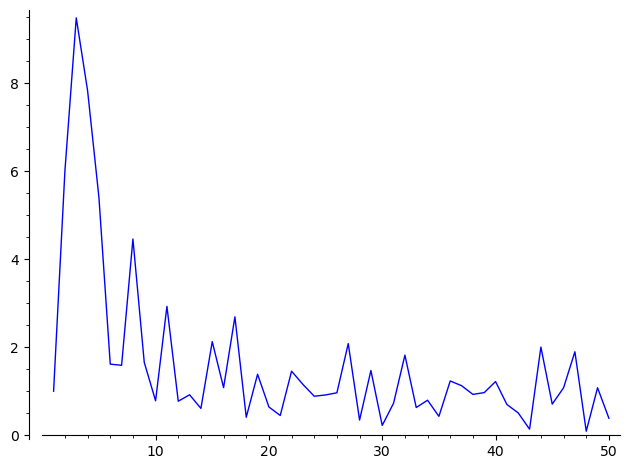

LOGS MINIMUM MODULI


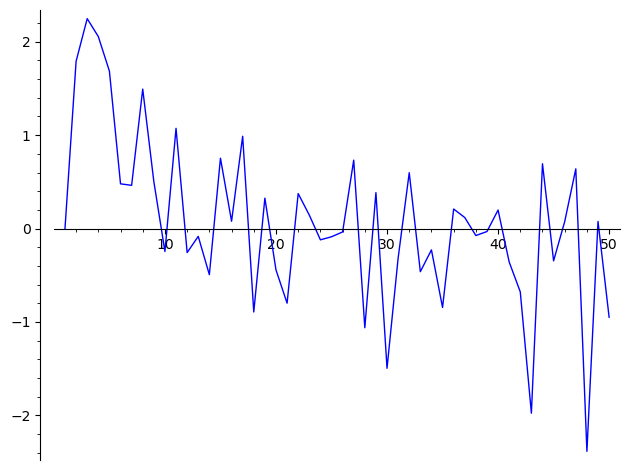

minimum logarithm of minimum modulus: -2.3871733338520485001225445422
MAXIMUM MODULI


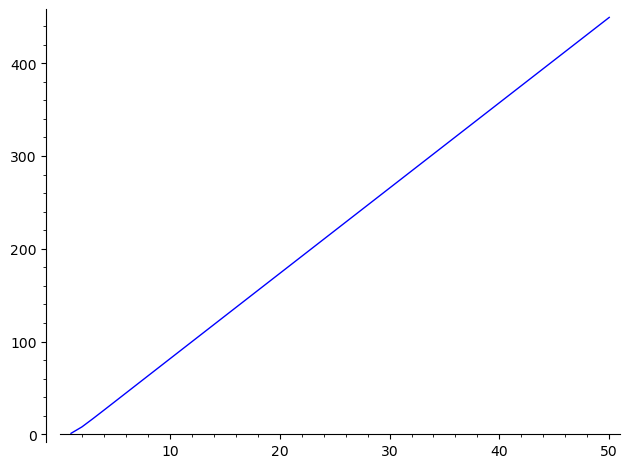

PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
----------------------------------------------------------------------------------------------------
(51, 0, 1760829099.294713)
PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
----------------------------------------------------------------------------------------------------
(52, 0, 1760829099.606006)
PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
----------------------------------------------------------------------------------------------------
(53, 0, 1760829099.748524)
PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
----------------------------------------------------------------

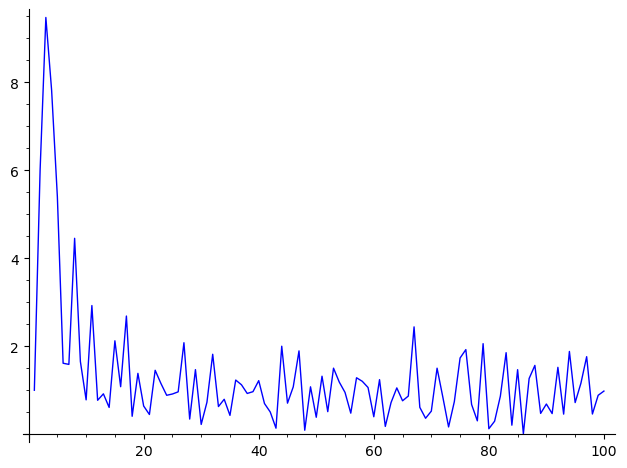

LOGS MINIMUM MODULI


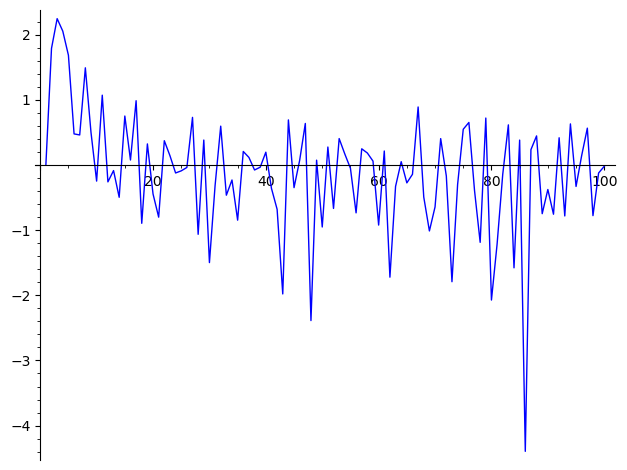

minimum logarithm of minimum modulus: -4.3952213768750682318645317957
MAXIMUM MODULI


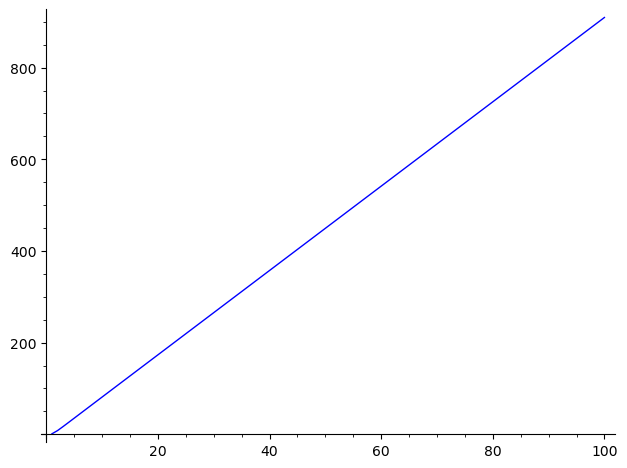

PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
----------------------------------------------------------------------------------------------------
(101, 0, 1760829155.172951)
PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
----------------------------------------------------------------------------------------------------
(102, 0, 1760829157.784459)
PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
----------------------------------------------------------------------------------------------------
(103, 0, 1760829160.3206558)
PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
------------------------------------------------------------

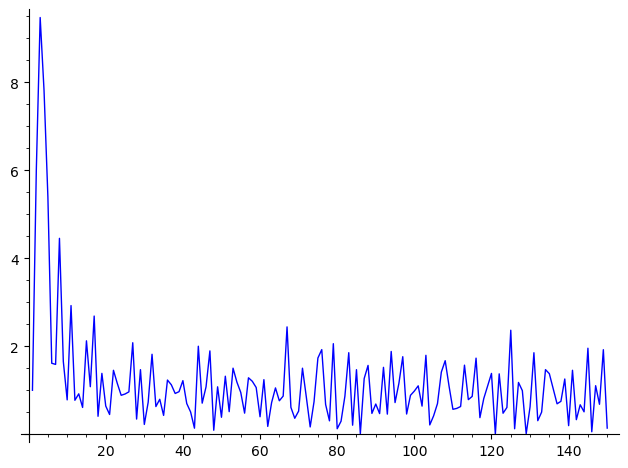

LOGS MINIMUM MODULI


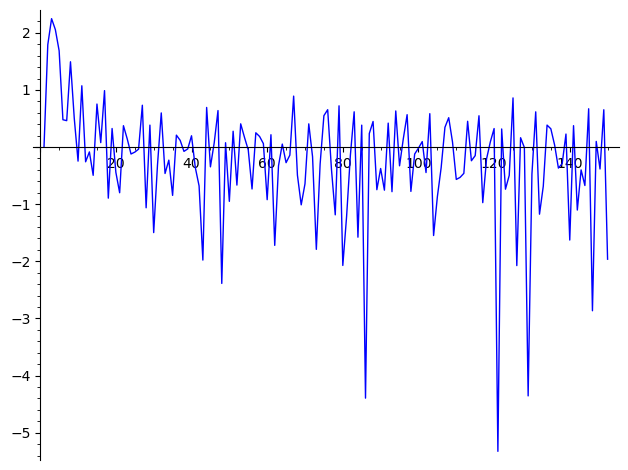

minimum logarithm of minimum modulus: -5.3268167140957837419584956782
MAXIMUM MODULI


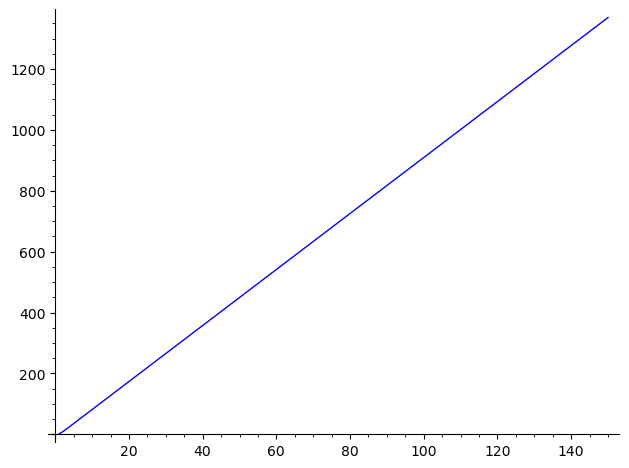

PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
----------------------------------------------------------------------------------------------------
(151, 0, 1760829464.581043)
PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
----------------------------------------------------------------------------------------------------
(152, 0, 1760829478.379918)
PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
----------------------------------------------------------------------------------------------------
(153, 0, 1760829491.692828)
PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
-------------------------------------------------------------

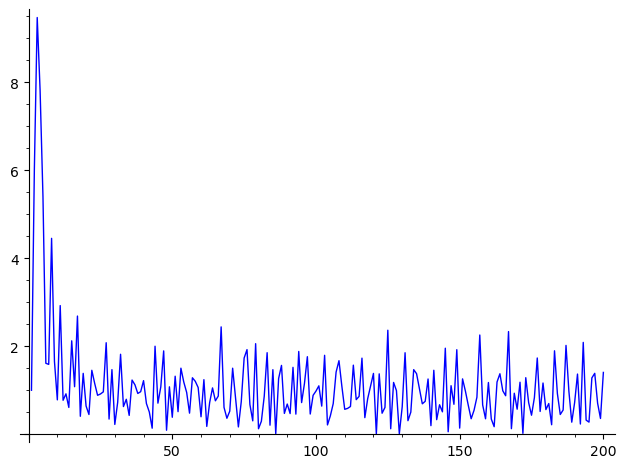

LOGS MINIMUM MODULI


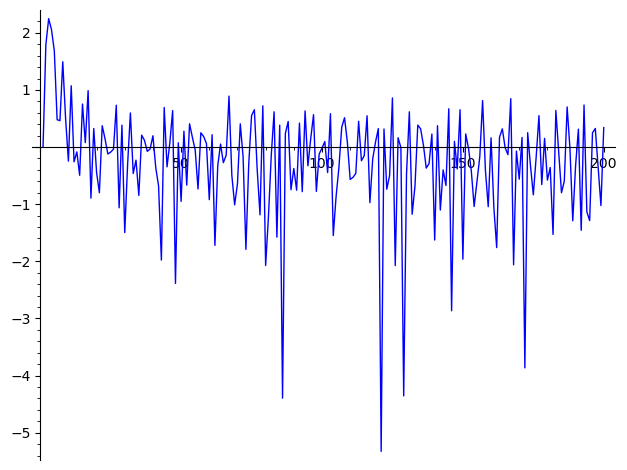

minimum logarithm of minimum modulus: -5.3268167140957837419584956782
MAXIMUM MODULI


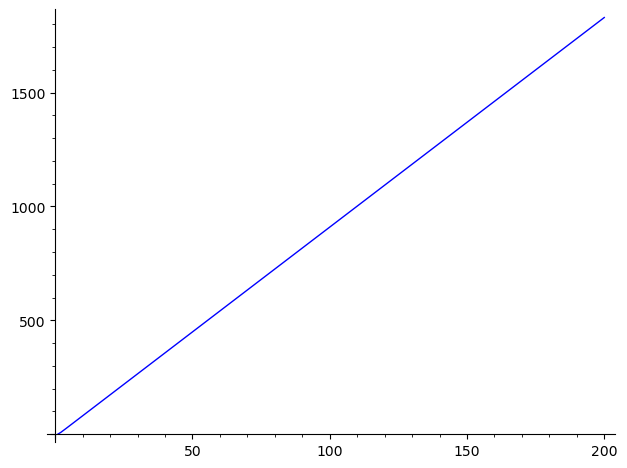

PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
tests:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


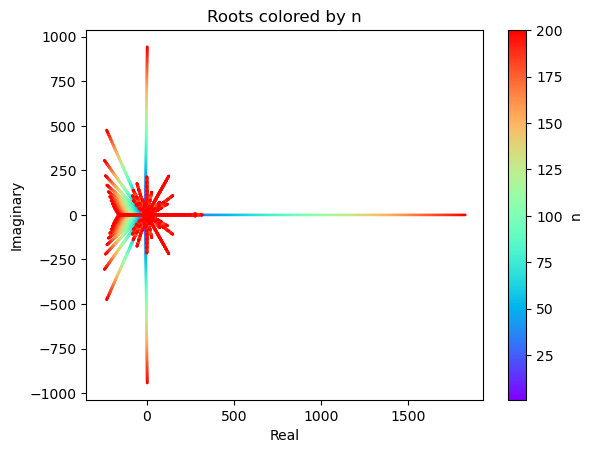

In [5]:
import pickle
from sage.all import sigma, nth_prime
import ast
import time

# Increase PARI stack size to handle large polynomial root computations
pari.allocatemem(7*10^9)  # Allocate 7GB for PARI stack

def nieburTau(n):
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2
    def step2(n, k):
        return sigma(k) * sigma(n - k)
    def step3(n):
        ans = 0
        for k in range(1, n):
            ans += step1(n, k) * step2(n, k)
        return 24*ans
    return n^4 * sigma(n) - step3(n)

def h(n):
    if n>0:
        return tau(n) # i.e., tauPrime(n)
    if n==0:
        return 1

h_list=[h(n) for n in range(0,302)]
with open('/Users/barrybrent/data/run18oct25no14.txt', 'rb') as rfile:
    j_list = pickle.load(rfile) #tauPrime(n) j-companion
    
def P_matrix(lst):
    lenlist=len(lst)
    columns=[lst]
    for k in range(1,lenlist):
        column=[0]*(k-1)
        column=column+[-k]
        column=flatten(column+[lst])
        column=column+[lst]
        column=column[:lenlist]
        columns+=[column]
    return (matrix(columns)).transpose()

def periodic_behavior_score(main_local_minima_list, min_score=0.3, max_period=100):
    """
    Analyzes periodic behavior for all v values in main_local_minima_list.
    Uses autocorrelation and FFT to detect ANY periodic pattern (not just sine waves).
    Filters out results with weak periodicity or unreasonably large periods.
    
    Args:
        main_local_minima_list: List of tuples [(v1, points1), (v2, points2), ...]
                                where points are [(x1, y1), (x2, y2), ...]
        min_score: Minimum periodicity score to accept (default: 0.3)
        max_period: Maximum allowed period (default: 100). Results with larger periods are rejected.
    
    Returns:
        results: List of tuples [(v, score, info_dict), ...] for valid results only
    """
    
    results = []
    rejected = []
    
    print("=" * 80)
    print("PERIODIC BEHAVIOR ANALYSIS RESULTS")
    print(f"(Rejecting: score < {min_score} or period > {max_period})")
    print("=" * 80)
    
    for points in mins_list:
        if len(points) < 4:
            continue
        
        # Extract x and y coordinates, converting to plain floats
        x_data = np.array([float(p[0]) for p in points])
        y_data = np.array([float(p[1]) for p in points])
        
        # Remove mean (detrend)
        y_detrended = y_data - np.mean(y_data)
        
        # --- Method 1: Autocorrelation Analysis ---
        autocorr = correlate(y_detrended, y_detrended, mode='full')
        autocorr = autocorr[len(autocorr)//2:]
        autocorr = autocorr / autocorr[0]  # Normalize
        
        # Find peaks in autocorrelation (excluding the first peak at lag=0)
        peaks, properties = find_peaks(autocorr[1:], prominence=0.1, distance=3)
        peaks = peaks + 1  # Adjust for excluding first element
        
        # Calculate periodicity score from autocorrelation
        if len(peaks) > 0:
            autocorr_score = autocorr[peaks[0]] if peaks[0] < len(autocorr) else 0
            spacing = np.mean(np.diff(x_data))
            autocorr_period = peaks[0] * spacing
        else:
            autocorr_score = 0
            autocorr_period = None
        
        # --- Method 2: FFT Analysis ---
        n = len(y_detrended)
        yf = fft(y_detrended)
        spacing = np.mean(np.diff(x_data))
        xf = fftfreq(n, spacing)[:n//2]
        power = 2.0/n * np.abs(yf[:n//2])
        
        if len(power) > 1:
            dominant_freq_idx = np.argmax(power[1:]) + 1
            dominant_freq = xf[dominant_freq_idx]
            fft_period = 1/dominant_freq if dominant_freq > 0 else None
            
            # FFT score: ratio of dominant peak to mean power
            mean_power = np.mean(power[1:])
            fft_score = power[dominant_freq_idx] / mean_power if mean_power > 0 else 0
            fft_score = min(fft_score / 10, 1.0)  # Normalize to 0-1 range
        else:
            fft_period = None
            fft_score = 0
            dominant_freq = 0
        
        # --- Combined Score ---
        combined_score = (autocorr_score + fft_score) / 2
        
        # Determine best period estimate
        if autocorr_period and fft_period:
            # Use autocorr period if both are available and similar
            if abs(autocorr_period - fft_period) / max(autocorr_period, fft_period) < 0.3:
                best_period = autocorr_period
                period_confidence = "high"
            else:
                # Use the one with higher score
                best_period = autocorr_period if autocorr_score > fft_score else fft_period
                period_confidence = "moderate"
        elif autocorr_period:
            best_period = autocorr_period
            period_confidence = "moderate"
        elif fft_period:
            best_period = fft_period
            period_confidence = "low"
        else:
            best_period = None
            period_confidence = "none"
        
        # Check rejection criteria
        rejection_reason = None
        if combined_score < min_score:
            rejection_reason = f"score = {combined_score:.3f} (too low)"
        elif best_period and best_period > max_period:
            rejection_reason = f"period = {best_period:.2f} (too large)"
        
        if rejection_reason:
            print(f"\nREJECTED v = {v}: {rejection_reason}")
            print(f"  ({len(peaks)} autocorrelation peaks found)")
            rejected.append((v, combined_score, best_period))
            continue
        
        # Package results
        info_dict = {
            'combined_score': combined_score,
            'autocorr_score': autocorr_score,
            'autocorr_period': autocorr_period,
            'autocorr_peaks': len(peaks),
            'fft_score': fft_score,
            'fft_period': fft_period,
            'dominant_frequency': dominant_freq,
            'best_period': best_period,
            'period_confidence': period_confidence
        }
        
        results.append((v, combined_score, info_dict))
        
        print(f"\nAnalyzing v = {v}:")
        print(f"  Autocorrelation peaks found: {len(peaks)}")
        print(f"  Combined periodicity score = {combined_score:.6f}")
        print(f"  Best period estimate = {best_period:.4f} (confidence: {period_confidence})")
        print(f"  Autocorrelation: score = {autocorr_score:.4f}, period = {(autocorr_period if autocorr_period else 0):.4f}")
        print(f"  FFT: score = {fft_score:.4f}, period = {(fft_period if fft_period else 0):.4f}")
        print(f"  Dominant frequency = {dominant_freq:.6f}")
    
    print("\n" + "=" * 80)
    print(f"ANALYSIS COMPLETE: {len(results)} valid results, {len(rejected)} rejected")
    print("=" * 80)
    
    return results

from sage.all import *
precision_bits = 100
CC = ComplexField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable
matrix_list=[]
charpol_list=[]
roots_list=[]
aar_list=[]
centers_list=[]
max_diameter_list=[]
mins_list=[]
log_mins_list=[]
maxes_list=[]
log_maxes_list=[]
dets=[]
tests=[]
for n in range(1, 201):
    print("----------------------------------------------------------------------------------------------------")
    undeformed_j_list=j_list[1:n+1]
    inputs=[pair[1] for pair in undeformed_j_list]
    pl=P_matrix(inputs) ### UNDEFORMED
    det=pl.det()
    test=det-h_list[n]*factorial(n)
    tests.append(test)
    print((n,test,time.time()))
    dets.append((n,det))
    matrix_list+=[(n,pl)]
    cp=pl.charpoly()
    charpol_list+=[(n,cp)]
    roots = cp.roots(ring=CC, multiplicities=False)       
    roots_list+=[(n,roots)]
    pairs = [(z.real(), z.imag()) for z in roots]
    aar = [r.abs() for r in roots]
    aar_list+=[(n,aar)]
    # compute absolute value for each root (before any conversion)
    if aar!=[]:
        minn = min(aar)  
        mins_list+=[(n,minn)]
        mins_list.append((n,minn))
        if minn>0:
            log_minn=log(minn)
            log_mins_list.append((n,log_minn))
        maxx = max(aar)  
        maxes_list.append((n,maxx))
        if maxx>0:
            log_maxx=log(maxx)
            log_maxes_list.append((n,log_maxx))
    if n%50==0:
        p = list_plot(mins_list, plotjoined=True, axes_labels=['', ''])
        print("MINIMUM MODULI")
        p.show()
        p = list_plot(log_mins_list, plotjoined=True, axes_labels=['', ''])
        print("LOGS MINIMUM MODULI")
        p.show()
        mml=[pair[1] for pair in log_mins_list]
        print("minimum logarithm of minimum modulus:",min(mml))
        p = list_plot(maxes_list, plotjoined=True, axes_labels=['', ''])
        print("MAXIMUM MODULI")
        p.show()
    results = periodic_behavior_score(mins_list, min_score=0.3, max_period=100)
print("tests:")
print(tests)
with open('/Users/barrybrent/data/run18oct25no115.txt', 'wb') as wfile:
    pickle.dump(roots_list, wfile) #output snipped

with open('/Users/barrybrent/data/run18oct25no116.txt', 'wb') as wfile:
    pickle.dump(charpol_list, wfile) #output snipped

with open('/Users/barrybrent/data/run18oct25no117.txt', 'wb') as wfile:
    pickle.dump(dets, wfile) #output snipped
    
with open('/Users/barrybrent/data/run18oct25no118.txt', 'wb') as wfile:
    pickle.dump(log_mins_list, wfile) #output snipped

with open('/Users/barrybrent/data/run18oct25no119.txt', 'wb') as wfile:
    pickle.dump(maxes_list, wfile) #output snipped

from sage.plot.colors import rainbow
import matplotlib.pyplot as plt

n_values = [n for n, roots in roots_list]
n_min, n_max = min(n_values), max(n_values)
colors = rainbow(len(n_values))

# Collect all points with their n values for matplotlib
all_points = []
all_n_values = []
for n, roots in roots_list:
    for z in roots:
        all_points.append((float(z.real()), float(z.imag())))
        all_n_values.append(n)

# Use matplotlib for better color mapping
real_parts = [p[0] for p in all_points]
imag_parts = [p[1] for p in all_points]

plt.scatter(real_parts, imag_parts, c=all_n_values, cmap='rainbow', s=1)
plt.colorbar(label='n')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Roots colored by n')
plt.show()